# <!-- TITLE --> __``` REAL-TIME OBJECT DETECTION ```__
#### <!-- AUTHOR --> - Author : __Dr. Amiehe-Essomba__ (c) 2023


In [ ]:
from demo.show_video import video 

video(video_path='./video/yolo_video2_pred.mp4')

## __```This notebook is only used for video prediction```__


> For video predictions please go [here](https://vision-api.streamlit.app/)

In [2]:
from yolo.utils.tools import read_classes, read_anchors
import pandas as pd 
import seaborn as sns
from yolo.utils.tools import get_colors_for_classes
import random
import matplotlib.colors as mcolors
from random import sample
import numpy as np 
from demo.encapsulation import Wrapper 
from demo.demo import demo


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(3)

#### __```Video Path```__

In [4]:
path        = "./video/yolo_video2.mp4"

#### __```Reading all classes and anchors```__

In [5]:
Class_names         = read_classes()
anchors             = read_anchors()

#### __```Hyper Parameters. You can change them```__

In [6]:
classes         = []
max_boxes       = 20
class_names     = []
score_threshold = 0.2
iou_threshold   = 0.2
response        = False
tracking        = False
tracker_type    = ("bytetrack.yaml", "botsort.yaml")
segmentation    = True

if segmentation is False:
    model_name  = "yolov8n.pt"

elif segmentation is True :
    model_name  = 'yolov8n-seg.pt'

else:
    model_name = "my_model"


#### __```Do not change this part of notebook.```__

In [7]:
if class_names: pass 
else: class_names = Class_names.copy()

kwargs = {
    "class_names"       : Class_names, 
    "Class_names"       : Class_names,
    "max_boxes"         : max_boxes,
    "score_threshold"   : score_threshold,
    "iou_threshold"     : iou_threshold,
    "anchors"           : anchors
    }

#### __```Set color boxes. Do not change anything here```__

In [8]:
class_names = kwargs['Class_names']
colors_     = get_colors_for_classes(len(class_names) + 10)

def f():
    s = random.sample(range(50), 1)
    return s[0] 

def g():
    num = random.sample(range(len(colors_)), len(class_names))
    return num 

colors      = {class_names[j] : colors_[i] if colors_[i] != (255, 255, 0) else colors_[j-1] for j, i in enumerate(g())}

### __```Parameters```__

In [9]:
model               = demo(model_name=model_name)
model.PATH          = path 
model.colors        = colors
model.model_name    = model_name
model.response      = response
model.youtube       = False 
model.save_file     = "video_prediction.mp4"

if tracking is True:
    model.tracker = tracker_type[0]

if segmentation is True:
    model.alpha = 30             # values in [0, 255]
    model.only_mask = True       
    model.mode  = "gray"         # value in ['gray', 'rgb']
    model.with_names = True 
    

### __```About Video```__

In [10]:
model.get_vido_info()

video details : 


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
frame per second : 30.0
video frame : 313
duration : 10.4333
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [11]:
model.duration_in_second = 10
model.video_step = 1
model.video_start = 0

### __```Prediction```__

In [ ]:
model.build_model(segmentation, **kwargs)
video(video_path=model.save_file)

#### __```Using the dictionary generated by the prediction to see all classes include in the predicted image```__
----

In [13]:
df          = model.df
data_frame  = pd.DataFrame(df)
data_frame.rename(columns={'label':'classes'}, inplace=True)
data_frame['count'] = [1 for i in range(len(data_frame.iloc[:, 0]))]


In [ ]:
data_frame = data_frame.groupby('classes').sum()
data_frame['labels'] = data_frame.index
data_frame.reset_index(drop=True, inplace=True)
display(data_frame)

#### __```Classes countplot```__

In [14]:
# colors
rot             = 90.
python_colors   = np.array( list( mcolors.CSS4_COLORS.keys() ) )
length          = len(data_frame.labels)
indexes         = sample(range(python_colors.shape[0]), k=length)
unique_color    = list( python_colors[indexes] )
print(f"unique classes : {length}")


unique classes : 11


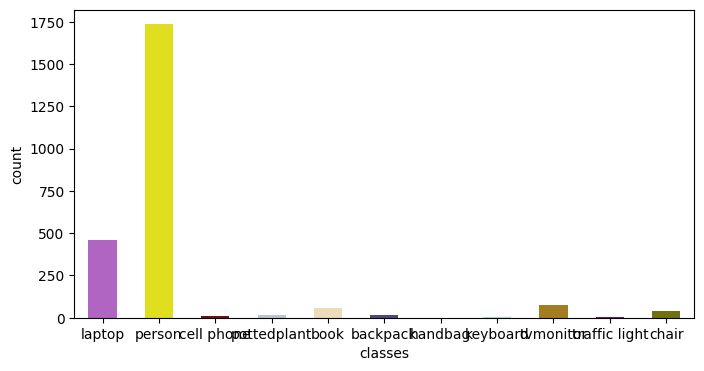

In [15]:
plt.figure(figsize=(8,4))
plt.bar(height=list( data_frame['count'] ), x= range(length),  width=0.5, color=unique_color)
plt.xticks(range(length), list(data_frame.labels), rotation=rot, ha="center")
plt.show()

#### __```Data Frame details:```__

* classes
* scores
* bonding boxes 
* encoding classses

In [16]:
display(data_frame.tail())

,classes,score,top,left,bottom,right,label
2417,person,0.64,109.790001,25.809999,400.609985,179.600006,1
2418,person,0.53,0.300000,155.970001,275.130005,296.369995,1
2419,chair,0.52,453.570007,466.339996,607.750000,596.210022,1
2420,person,0.46,0.140000,292.980011,91.889999,391.200012,1
2421,book,0.35,255.429993,100.980003,431.540009,208.220001,1


<img width="180px" height="200px" src="https://i.pinimg.com/originals/18/e1/11/18e1110635dc82318910603571fe4e5a.jpg"></img>